
## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train, sizes_train, coords_train = train['features'], train['labels'], train['sizes'], train['coords']
X_test, y_test, sizes_test, coords_test = test['features'], test['labels'], test['sizes'], test['coords']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
# image_shape = ?

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
# print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("Length of training data", len(X_train))
print("Length of testing data", len(X_test))

Number of training examples = 39209
Number of testing examples = 12630
Number of classes = 43
Length of training data 39209
Length of testing data 12630


### Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

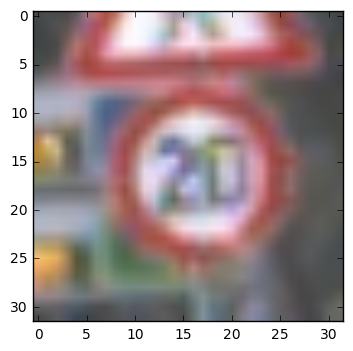

In [4]:
import cv2
import numpy as np

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline 
plt.imshow(X_train[1])

# print(X_train[1200])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
### Train your model here.
### Feel free to use as many code cells as needed.

import pickle
import cv2
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split

EPOCHS = 40
BATCH_SIZE = 1000

def preprocess(X_train, y_train, X_test):
    X_train, y_train = shuffle(X_train, y_train)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0
    X_test = X_test / 255.0
    
    return (X_train, X_valid, y_train, y_valid, X_test)

def LeNet(x):
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # ceil(float(3-3+1)/1)=ceil(1)=1
    # Color Layer, Input = 32x32x3, Output = (32-5)/1+1 = 28
    color_layer = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32)), name='color_layer')
    color_b = tf.Variable(tf.zeros(32), name='color_b')
    color = tf.nn.conv2d(x, color_layer, strides=[1, 1, 1, 1], padding='VALID') + color_b
    print("Color", color.get_shape())
    
    # SOLUTION: Activation.
    colorconv = tf.nn.relu(color)

    # SOLUTION: Layer 1: Convolutional. Input = 28x28x64. Output = 26x26x64.
    # (28-3)/(1)+1 = 26
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(32), name='conv1_b')
    conv1   = tf.nn.conv2d(colorconv, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print("Conv1", conv1.get_shape())

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 26x26x64. Output = 13x13x64.
    # (26-2+1)/2 = ceil(25/2) = 13
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print("Conv1", conv1.get_shape())

    # SOLUTION: Layer 2: Convolutional. Input = 13x13x64 Output = 9x9x128.
    # ceil((13-5+1)/1) = ceil(10)
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(64), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print("Conv2", conv2.get_shape())

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Input: 9x9x128 Output = 5x5x128
    # Ceil(9-5+1/1)=Ceil(5/1)=5
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 64), mean = mu, stddev = sigma), name='conv3_W')
    conv3_b = tf.Variable(tf.zeros(64), name='conv3_b')
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    print("Conv3", conv3.get_shape())
    
    conv3 = tf.nn.relu(conv3)
    
    # Input: 5x5x128, Output: 2x2x128
    # Ceil((5-2+1)/2)=Ceil(4/2)=2
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print('Conv3', conv3.get_shape())

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    # ceil (10-2+1)/2 = 9/2 = 5
    # conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # print("Conv2", conv2.get_shape())

    # SOLUTION: Flatten. Input = 2x2x128. Output = 512.
    fc0   = flatten(conv3)

    # SOLUTION: Layer 3: Fully Connected. Input = 512. Output = 43.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(43), name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    print("Fc1", fc1.get_shape())

    return fc1

def eval_data(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
        

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
fc2 = LeNet(x)

correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, one_hot_y))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

if __name__ == '__main__':
    # Load Data

    training_file = 'traffic-signs-data/train.p'
    testing_file = 'traffic-signs-data/test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    
    X_train, y_train, sizes_train, coords_train = train['features'], train['labels'], train['sizes'], train['coords']
    X_test, y_test, sizes_test, coords_test = test['features'], test['labels'], test['sizes'], test['coords']
    
    (X_train, X_valid, y_train, y_valid, x_test) = preprocess(X_train, y_train, X_test)
    
    saver = tf.train.Saver()
    tf.add_to_collection('x', x)
    tf.add_to_collection('fc2', fc2)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        
        round = 0
        rounds = num_examples // BATCH_SIZE
        
        for i in range(EPOCHS):
            print("EPOCH", i)
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                round = round + 1
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})
        
                val_acc = eval_data(X_valid, y_valid)
                print("Validation Accuracy = {:.3f}".format(val_acc))
        
        test_acc = eval_data(X_test, y_test)
        print("Test Validation Accuracy = {:.3f}".format(test_acc))
        saver.save(sess, "trained_model_advanced_final")
        print("Saved model.")

Color (?, 28, 28, 32)
Conv1 (?, 26, 26, 32)
Conv1 (?, 13, 13, 32)
Conv2 (?, 9, 9, 64)
Conv3 (?, 5, 5, 64)
Conv3 (?, 2, 2, 64)
Fc1 (?, 43)
EPOCH 0
Validation Accuracy = 0.041
Validation Accuracy = 0.024
Validation Accuracy = 0.019
Validation Accuracy = 0.035
Validation Accuracy = 0.048
Validation Accuracy = 0.059
Validation Accuracy = 0.055
Validation Accuracy = 0.057
Validation Accuracy = 0.070
Validation Accuracy = 0.092
Validation Accuracy = 0.118
Validation Accuracy = 0.144
Validation Accuracy = 0.156
Validation Accuracy = 0.166
Validation Accuracy = 0.177
Validation Accuracy = 0.185
Validation Accuracy = 0.197
Validation Accuracy = 0.213
Validation Accuracy = 0.221
Validation Accuracy = 0.231
Validation Accuracy = 0.242
Validation Accuracy = 0.252
Validation Accuracy = 0.261
Validation Accuracy = 0.274
Validation Accuracy = 0.287
Validation Accuracy = 0.299
Validation Accuracy = 0.311
Validation Accuracy = 0.321
Validation Accuracy = 0.331
Validation Accuracy = 0.346
Validation Acc

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
### Preprocessed the data by normalizing the data values to be 0 - 1 by dividing it by 255.
### I choose that technique because makes the data values to be 0 - 1 and thus result in a better trained model, it was also simple to implement.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### I split the training data into training and validation. This way we can train on the training data and measure
### the accuracy of the model as we train on the validation data. After training has been finished, we can do a final
### test on accuracy on the test data.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Architecture description

### Conv Network of shape (5x5x32) with stride of 1 transforming (32x32x3) -> (28x28x32)
### relu activation
### Conv Network of shape (3x3x32) with stride of 1 transforming (28x28x32) -> (26x26x32)
### relu activation
### max pool (2x2) with stride of 2 transforming (26x26x32) -> (13x13x32)
### Conv Network of shape (5x5x64) with stride of 1 transforming (13x13x32) -> (9x9x64)
### relu activation
### Conv Network of shape (5x5x64) with stride of 1 transforming (9x9x64) -> (5x5x64)
### relu activation
### max pool (2x2) with stride of 2 transforming (5x5x64) -> (2x2x64)
### Flatten (2x2x64) to 256
### Fully connected layer connecting 256 to 43

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Epochs = 35
Optimizer type = Adam Optimizer
Batch Size = 1000
train and test split on training data was 0.8 and 0.2

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

Initially I started with trial and error and then I got stuck.
Afterwards I started to read about conv net, particularly here http://cs231n.github.io/convolutional-networks/
I learned from other architectures what are the common patterns and I tweaked the one I had to match the common patterns.

I printed the accuracy of the validation as I train to see how my model is progressing and when I felt the model was doing well, I would change the epochs from 10 to 35.

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import csv
import pickle
import cv2
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split


def imageprepare(imagepath):
    image = cv2.imread(imagepath)
    image = cv2.resize(image, (32, 32))
    
    return image

def getsignsdictionary():
    with open('signnames.csv', mode='r') as infile:
        reader = csv.reader(infile)
        return dict((rows[0], rows[1]) for rows in reader)
    
def predict(imagepath):
    signs = getsignsdictionary()
    image = imageprepare(imagepath)
    
    with tf.Session() as sess:
        new_saver = tf.train.import_meta_graph('trained_model_advanced_final.meta')
        new_saver.restore(sess, tf.train.latest_checkpoint('./'))
        fc2 = tf.get_collection('fc2')[0]
        x = tf.get_collection('x')[0]
        predict = tf.argmax(fc2, 1)
        most_likely_class = sess.run(predict, feed_dict={x: [image]})
        # fc2_result = sess.run(fc2, feed_dict={x: [image]})
        # print(fc2_result)
        # top_k = sess.run(tf.nn.top_k(fc2_result, k=3))
        # print(top_k)
        return signs[str(most_likely_class[0])]
    
print("Limit 65 predicted as: ", predict('signs/speed_limit_65.jpg'))
print("Children crossing predicted as: ", predict('signs/children_crossing.jpg'))
print("Keep right predicted as: ", predict('signs/keep_right.png'))
print("Yield Sign predicted as: ", predict('signs/yield_sign.jpeg'))
print("Sliperry road predicted as: ", predict('signs/sliperry_road.png'))
print("Pedestrian predicted as: ", predict('signs/pedestrian.jpg'))
print("Limit 50 predicted as: ", predict('signs/speed_limit_50.jpg'))
print("Stop predicted as: ", predict('signs/stop_sign.png'))
print("Speed Limit 80 as: ", predict('signs/speed__limit_80.png'))
print("Speed Limit 65 as: ", predict('signs/speed_limit_65_2.jpg'))
print("Speed Limit 25 as: ", predict('signs/speed_limit_25.png'))
# print("Stop Sign as: ", predict('stop_sign_3.jpg'))
# print("Speed Limit 40 as: ", predict('speed_limit_40.jpg'))
# print("Animals crossing as: ", predict('no_u_turn.png'))
# print("Stop sign 2 as: ", predict('stop_sign_2.png'))

Limit 65 predicted as:  Traffic signals
Children crossing predicted as:  End of speed limit (80km/h)
Keep right predicted as:  Keep left
Yield Sign predicted as:  Yield
Sliperry road predicted as:  Vehicles over 3.5 metric tons prohibited
Pedestrian predicted as:  Go straight or left
Limit 50 predicted as:  General caution
Stop predicted as:  Turn right ahead
Speed Limit 80 as:  Traffic signals
Speed Limit 65 as:  Traffic signals
Speed Limit 25 as:  No passing for vehicles over 3.5 metric tons


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

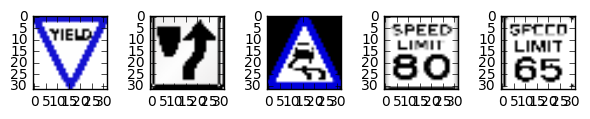

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

import random
import matplotlib.pyplot as plt

def imageprepare(imagepath):
    image = cv2.imread(imagepath)
    image = cv2.resize(image, (32, 32))
    
    return image

signs = [
    imageprepare('signs/yield_sign.jpeg'),
    imageprepare('signs/keep_right.png'),
    imageprepare('signs/sliperry_road.png'),
    imageprepare('signs/speed__limit_80.png'),
    imageprepare('signs/speed_limit_65_2.jpg'),
]

fig, axes = plt.subplots(1,5)
for i, (image, ax) in enumerate(zip(signs, axes)):
    ax.imshow(image)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### Yield was correctly predicted.
### The rest were not correctly guessed:
### Keep right was incorrect guessed as keep left.
### Slipery road was incorrectly guessed as 'Vehicles over 3.5 metric tons prohibited'
### Both speed limit were incorrectly guessed as 'Traffic signals'

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [6]:
### The model is not able to perform equally well on captured pictures as compared to the dataset.
### The model performs much better on the dataset.

### Prediction accuracy on dataset: 92.2%
### Predication accuracy on captured images: 9% [1 out of 11]

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import csv
import pickle
import cv2
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split


def imageprepare(imagepath):
    image = cv2.imread(imagepath)
    image = cv2.resize(image, (32, 32))

    # %matplotlib inline 
    # plt.imshow(image)
    
    return image

def getsignsdictionary():
    with open('signnames.csv', mode='r') as infile:
        reader = csv.reader(infile)
        return dict((rows[0], rows[1]) for rows in reader)
    
def predict(imagepath):
    signs = getsignsdictionary()
    image = imageprepare(imagepath)
    
    with tf.Session() as sess:
        new_saver = tf.train.import_meta_graph('trained_model_advanced_final.meta')
        new_saver.restore(sess, tf.train.latest_checkpoint('./'))
        fc2 = tf.get_collection('fc2')[0]
        x = tf.get_collection('x')[0]
        predict = tf.argmax(fc2, 1)
        # most_likely_class = sess.run(predict, feed_dict={x: [image]})
        fc2_result = sess.run(fc2, feed_dict={x: [image]})
        # print(fc2_result)
        top_k = sess.run(tf.nn.top_k(tf.constant(fc2_result), k=3))
        # print(top_k.indices[0][0], top_k.indices[0][1], top_k.indices[0][2])
        # print(top_k)
        most_likely_classes = (
            top_k.indices[0][0],
            top_k.indices[0][1],
            top_k.indices[0][2]
        )
        return (
            signs[str(most_likely_classes[0])],
            signs[str(most_likely_classes[1])],
            signs[str(most_likely_classes[2])],
        )
    
print("Limit 65 predicted as: ", predict('signs/speed_limit_65.jpg'))
print("Children crossing predicted as: ", predict('signs/children_crossing.jpg'))
print("Keep right predicted as: ", predict('signs/keep_right.png'))
print("Yield Sign predicted as: ", predict('signs/yield_sign.jpeg'))
print("Sliperry road predicted as: ", predict('signs/sliperry_road.png'))
print("Pedestrian predicted as: ", predict('signs/pedestrian.jpg'))
print("Limit 50 predicted as: ", predict('signs/speed_limit_50.jpg'))
print("Stop predicted as: ", predict('signs/stop_sign.png'))
print("Speed Limit 80 as: ", predict('signs/speed__limit_80.png'))
print("Speed Limit 65 as: ", predict('signs/speed_limit_65_2.jpg'))
print("Speed Limit 25 as: ", predict('signs/speed_limit_25.png'))


Limit 65 predicted as:  ('Traffic signals', 'Dangerous curve to the left', 'Go straight or right')
Children crossing predicted as:  ('End of speed limit (80km/h)', 'Vehicles over 3.5 metric tons prohibited', 'Right-of-way at the next intersection')
Keep right predicted as:  ('Keep left', 'Bumpy road', 'Beware of ice/snow')
Yield Sign predicted as:  ('Yield', 'Keep left', 'No vehicles')
Sliperry road predicted as:  ('Vehicles over 3.5 metric tons prohibited', 'End of speed limit (80km/h)', 'Speed limit (80km/h)')
Pedestrian predicted as:  ('Go straight or left', 'General caution', 'Keep right')
Limit 50 predicted as:  ('General caution', 'Traffic signals', 'Dangerous curve to the left')
Stop predicted as:  ('Turn right ahead', 'Keep right', 'Turn left ahead')
Speed Limit 80 as:  ('Traffic signals', 'Go straight or right', 'Road work')
Speed Limit 65 as:  ('Traffic signals', 'Dangerous curve to the left', 'Go straight or right')
Speed Limit 25 as:  ('No passing for vehicles over 3.5 metr